<a href="https://colab.research.google.com/github/Sage-32/vote-prediction/blob/vote/copy_of_untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
sage = pd.read_csv('/content/Support_for_Candidatecsv.csv')
print("Shape of the dataset:",sage.shape)
sage.head(10)

Shape of the dataset: (10, 5)


,Facebook_activity,Twitter_activity,Instagram_activity,Voter_registration_status,Support_for_Candidate
0,10,5,8,1,1
1,5,3,4,0,0
2,8,2,7,1,1
3,2,8,3,0,0
4,15,10,10,1,1
5,20,15,18,1,1
6,12,7,14,0,0
7,7,12,5,1,1
8,0,6,9,0,0
9,18,10,20,1,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sage = pd.read_csv('/content/Support_for_Candidatecsv.csv')

X = sage.drop('Support_for_Candidate', axis=1)
y = sage['Support_for_Candidate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
will = DecisionTreeClassifier(criterion='entropy',random_state=42)
will.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = will.predict(X_test)
print(y_pred)

[0 0]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[2]]


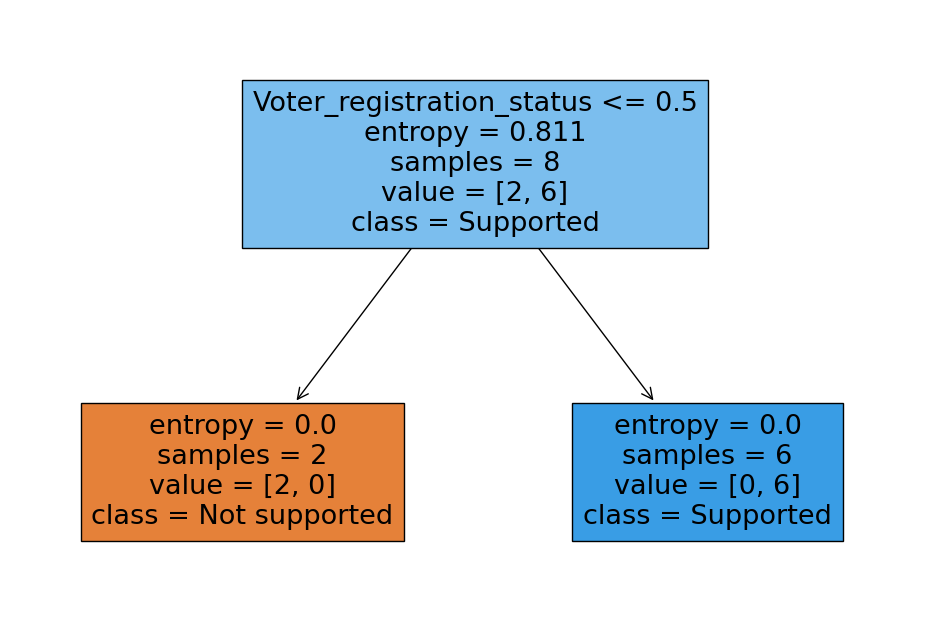

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(will, filled=True, feature_names=X.columns, class_names=["Not supported", "Supported"])
plt.show()

In [ ]:
import joblib
will = DecisionTreeClassifier(random_state=42)
will.fit(X_train, y_train)
joblib.dump(will, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [ ]:
import joblib
import pandas as pd
loaded_model = joblib.load('decision_tree_model.pkl')
new_data = pd.DataFrame ({
    'Facebook_activity': [3, 1, 5, 2],
    'Twitter_activity': [50, 10, 70, 30],
    'Instagram_activity': [10, 2, 15, 5],
    'Voter_registration_status': [1, 0, 1, 0]
})


In [ ]:
predictions = loaded_model.predict(new_data)
support_mapping = {0 :"0-Not supported", 1:"1-Supported"}
for i, prediction in enumerate(predictions):
  label = support_mapping[prediction]
  print(f"Data {i + 1}: Predicted Candidate_Support - {label}")

Data 1: Predicted Candidate_Support - 1-Supported
Data 2: Predicted Candidate_Support - 0-Not supported
Data 3: Predicted Candidate_Support - 1-Supported
Data 4: Predicted Candidate_Support - 0-Not supported
